<a href="https://colab.research.google.com/github/ismailsg/BigMat_Outlet_Sales/blob/main/BigMat_Outlet_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hypothesis Generation**
Features based on the Store :
1. **The city of the store :**
Stores located in big and famous cities have higher sales comapred to others cities
2. **The location of the store in the city :**
Stores located in the city center or affluent neighborhood should have higher sales compared to stores on the outskirts of the city.
3. **Seniority of the store  :**
Old Stores  should sell higher than other stores because more people know about them .
4. **Size of the store :**
Large stores should have higher sales than medium and small stores.
5. **Store design and architecture:**
Distinguished and unique design  can attract customers.
6. **Reputation of stores:**
Stores having a good reputation can attract customers and sell more products.
7. **Store sellers**
The more talented and professional the sellers are, the more they sell.

Features based on the Product :
1. **Product Utility:**
Daily use products have a higher tendency to sell compared to other products.
2. **Product Quality**
Product with a good quality can attract customers and sell more.
3. **Product Price:**
Products that are cheap or on sale encourage customers to buy them .


Features based on the Customer :
1. **Job profile and annual income:**
A customer with a stable job and high income should have higher purchases.
2. **Family size:**
A customer with a large family should have higher purchases
3. **Gender:**
Woman buy more products than man . 
4. **Age categories:** 
Young people tend to shop more .

In [248]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




**Loading Packages and Data**

In [249]:
filename='/content/drive/MyDrive/Train.csv'

my_data=pd.read_csv(filename)

print(my_data.head(5))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

**Data Structure and Content**

In [250]:
print(str(my_data))
print(my_data.shape)
print(my_data.info())
print(my_data.describe())

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [251]:
print(my_data.dtypes)
missingData = my_data.isnull().sum()
print(missingData)
print(len(my_data['Item_Weight'].unique()))
print(my_data['Outlet_Size'].unique())

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
416
['Medium' nan 'High' 'Small']


In [252]:
rows = my_data.shape[0]
print(rows)
dupl_rows = my_data[my_data['Item_Weight'].duplicated()]
null_rows = my_data[my_data['Item_Weight'].isnull()]
print("number of null values",rows - len(null_rows))
print("number of duplicate values",rows - len(dupl_rows))

8523
number of null values 7060
number of duplicate values 416


In [253]:
my_data.groupby(my_data['Outlet_Identifier']).sum()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT010,7166.800,56.308832,78131.5646,1108890,1.883402e+05
OUT013,12121.730,55.879859,131809.0156,1851884,2.142664e+06
OUT017,11877.495,56.834646,129103.9564,1858482,2.167465e+06
OUT018,11946.465,56.621454,131477.7724,1864352,1.851823e+06
OUT019,0.000,57.257041,73807.5824,1048080,1.796941e+05
OUT027,0.000,54.804764,130714.6746,1855975,3.453926e+06
OUT035,11931.295,56.974873,133103.9070,1863720,2.268123e+06
OUT045,11751.840,56.180780,130942.7782,1859858,2.036725e+06
OUT046,11966.125,56.231875,132113.3698,1857210,2.118395e+06


In [254]:
for col in my_data.columns:
  if my_data[col].dtype == object and col not in ["Outlet_Identifier","Item_Identifier"]:
    print(col+ ' : ',my_data[col].unique())

Item_Fat_Content :  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type :  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size :  ['Medium' nan 'High' 'Small']
Outlet_Location_Type :  ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type :  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [255]:
my_data.loc[my_data['Item_Weight'].isnull()]
#my_data.loc[my_data['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [256]:
for id in set(my_data["Item_Identifier"]):
  try:
    my_data.loc[(my_data["Item_Identifier"] == id), "Item_Weight"]=  list(my_data.loc[(my_data["Item_Identifier"] == id) & (my_data["Item_Weight"])]["Item_Weight"].head(1))[0]
  except :
    my_data=my_data[my_data["Item_Identifier"]!=id]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [257]:
missingData = my_data.isnull().sum()
print(missingData)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [258]:
my_data.loc[(my_data['Outlet_Type'] == 'Supermarket Type3')& (my_data['Outlet_Location_Type']=='Tier 3')]['Outlet_Size'].head(50)
my_data.loc[(my_data['Outlet_Type'] == 'Supermarket Type3')& (my_data['Outlet_Location_Type']=='Tier 3'),'Outlet_Size']='Medium'
my_data.loc[(my_data['Outlet_Type'] == 'Supermarket Type1')& (my_data['Outlet_Location_Type']=='Tier 2')]['Outlet_Size'].head(50)
my_data.loc[(my_data['Outlet_Type'] == 'Supermarket Type1')& (my_data['Outlet_Location_Type']=='Tier 2'),'Outlet_Size']='Small'
my_data.loc[(my_data['Outlet_Type'] == 'Supermarket Type1')& (my_data['Outlet_Location_Type']=='Tier 3')]['Outlet_Size'].head(50)
my_data.loc[(my_data['Outlet_Type'] == 'Supermarket Type1')& (my_data['Outlet_Location_Type']=='Tier 3'),'Outlet_Size']='High'
missingData = my_data.isnull().sum()
print(missingData)

len(my_data.loc[(my_data['Outlet_Type']=='Grocery Store')&(my_data['Outlet_Location_Type'] == 'Tier 3') & (my_data['Outlet_Size'].isnull()) ]['Outlet_Size'])
my_data.loc[(my_data['Outlet_Type']=='Grocery Store')&(my_data['Outlet_Location_Type'] == 'Tier 3')]

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [259]:
my_data.groupby(my_data['Outlet_Identifier']).count()
my_data.loc[(my_data['Outlet_Identifier'].isin(['OUT010','OUT019']))]
my_data.loc[(my_data['Outlet_Identifier']=='OUT010'),'Outlet_Size'] = 'Small'

In [260]:
missingData = my_data.isnull().sum()
print(missingData)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


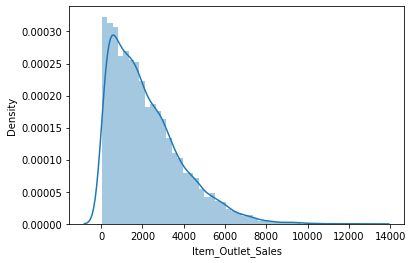

In [261]:
sns.distplot(my_data['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


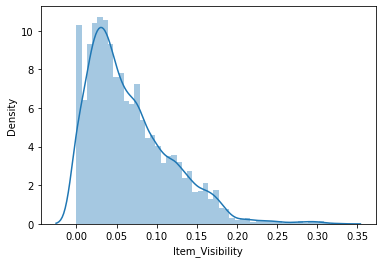

In [262]:
sns.distplot(my_data.Item_Visibility)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


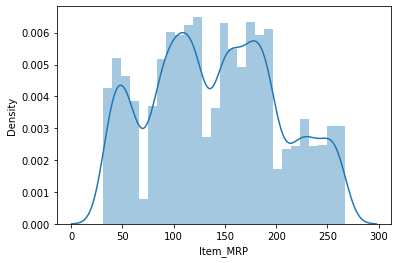

In [263]:
sns.distplot(my_data.Item_MRP)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


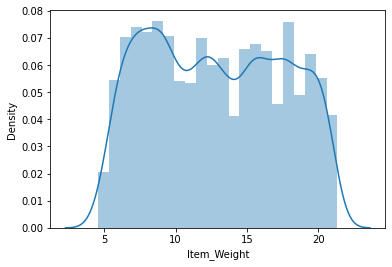

In [264]:
sns.distplot(my_data.Item_Weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


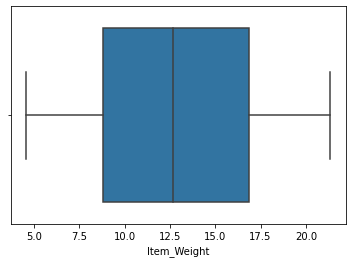

In [265]:
sns.boxplot(my_data.Item_Weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


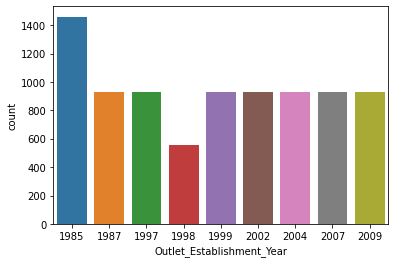

In [266]:
sns.countplot(my_data.Outlet_Establishment_Year)

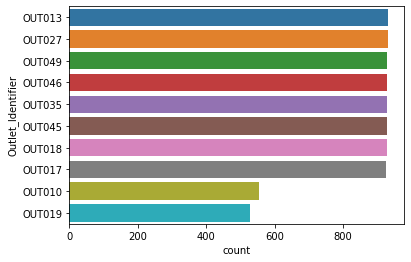

In [267]:
sns.countplot(y=my_data.Outlet_Identifier, order = my_data['Outlet_Identifier'].value_counts().index)

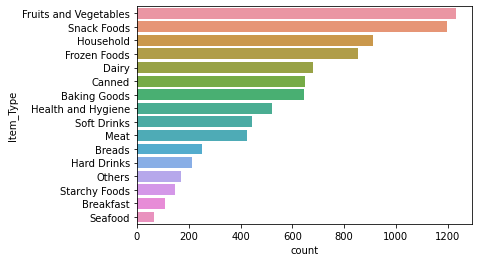

In [268]:
sns.countplot(y=my_data.Item_Type, order = my_data['Item_Type'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


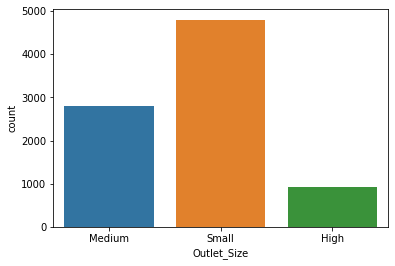

In [269]:
sns.countplot(my_data.Outlet_Size)

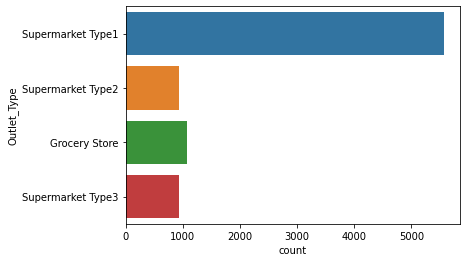

In [270]:
sns.countplot(y=my_data.Outlet_Type)

**Bivariate** **Analysis**

In [271]:
corr = my_data.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


In [272]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567803
Item_Weight                  0.013168
Outlet_Establishment_Year   -0.049083
Item_Visibility             -0.128297
Name: Item_Outlet_Sales, dtype: float64

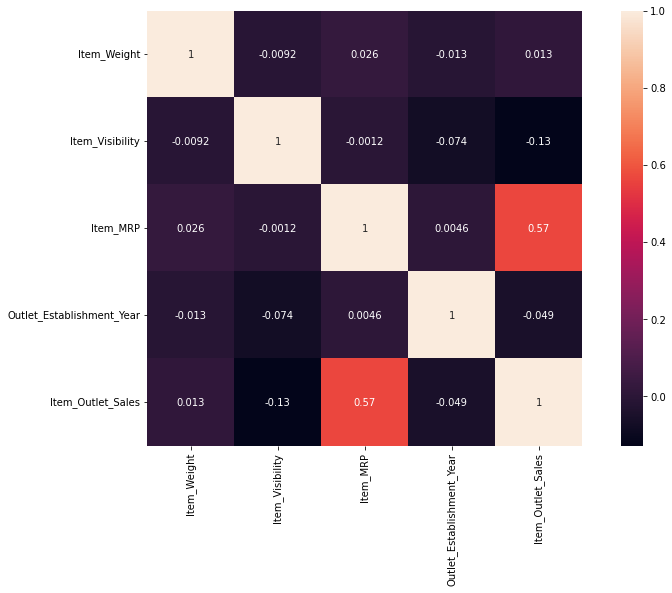

In [273]:
plt.figure(figsize = (14, 8))
sns.heatmap(corr, annot = True, square = True)

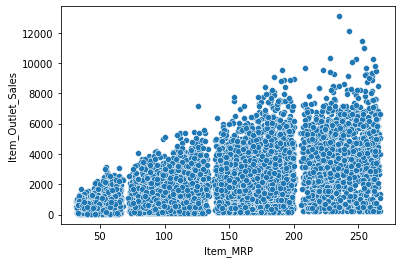

In [274]:
sns.scatterplot(x=my_data['Item_MRP'],y=my_data['Item_Outlet_Sales'])



*   The plot shows that more the price of item, the better is its outlet sale.
*   The relation is almost linear.





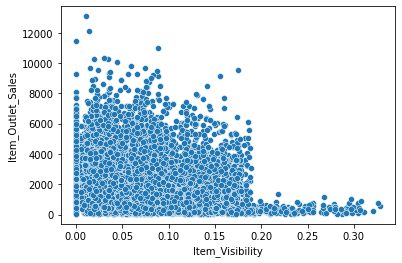

In [275]:
sns.scatterplot(x=my_data['Item_Visibility'],y=my_data['Item_Outlet_Sales'])

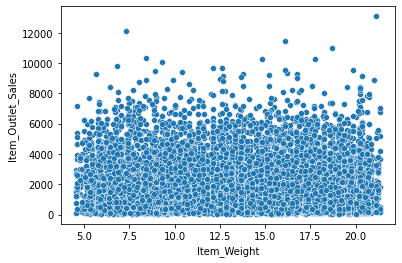

In [276]:
sns.scatterplot(x=my_data['Item_Weight'], y=my_data['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


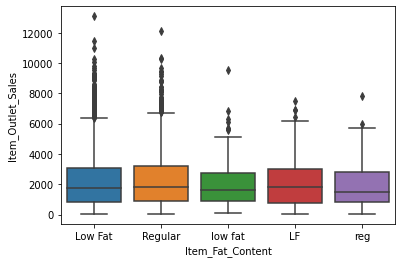

In [277]:
sns.boxplot(my_data.Item_Fat_Content, my_data.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

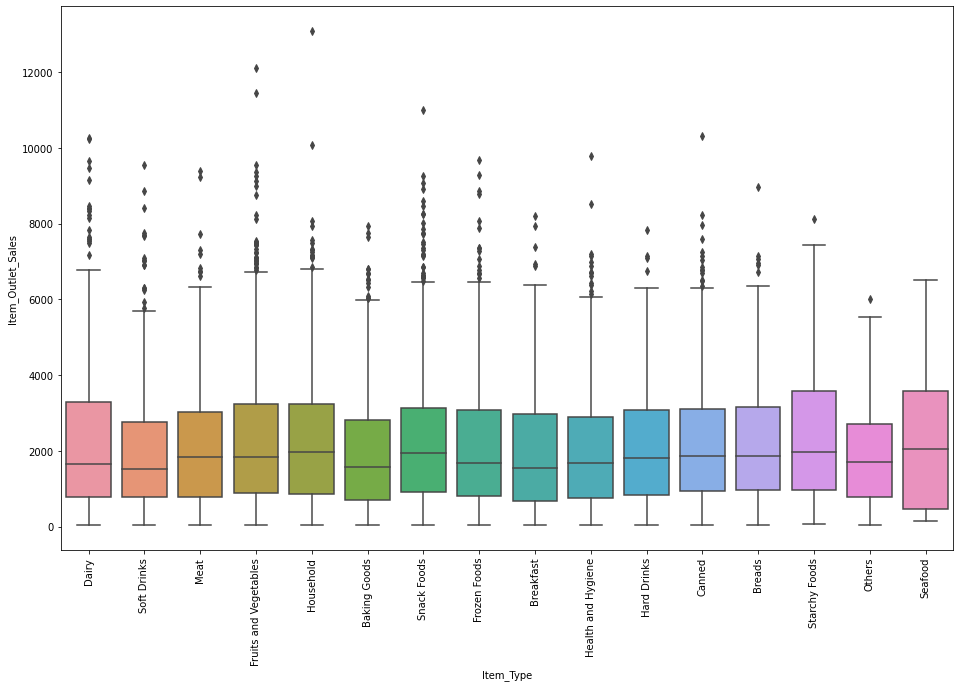

In [278]:
plt.figure(figsize = [16,10])
sns.boxplot(my_data.Item_Type, my_data.Item_Outlet_Sales)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


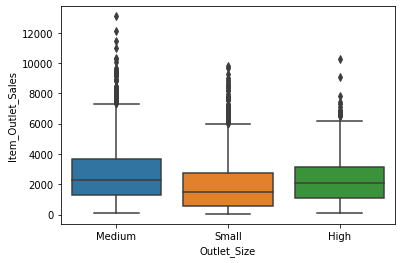

In [279]:
sns.boxplot(my_data.Outlet_Size, my_data.Item_Outlet_Sales)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

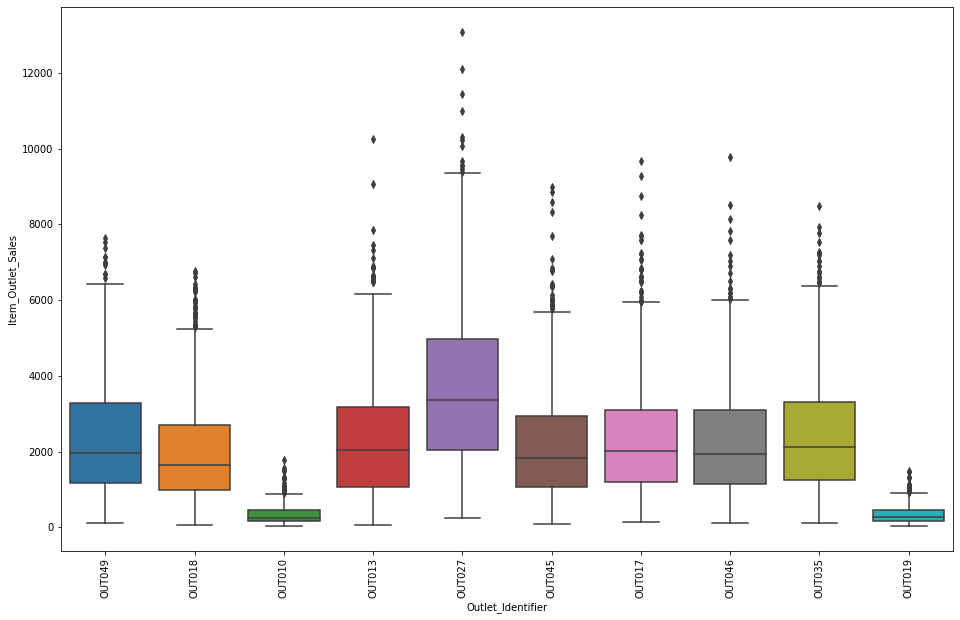

In [280]:
plt.figure(figsize = [16,10])
sns.boxplot(my_data.Outlet_Identifier, my_data.Item_Outlet_Sales)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


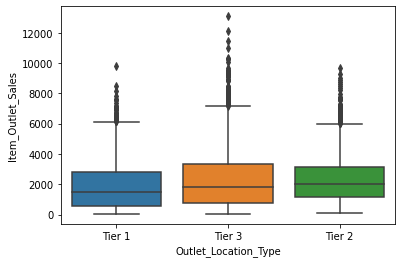

In [281]:
sns.boxplot(my_data.Outlet_Location_Type, my_data.Item_Outlet_Sales)

In [282]:
my_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Categorical Values**

In [283]:
my_data['Outlet_Type']  = my_data['Outlet_Type'].replace({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3})
my_data['Item_Fat_Content'] = my_data['Item_Fat_Content'].replace({'Low Fat': 0,'LF': 0, 'low fat': 0,'Regular': 1,'reg': 1})
my_data['Outlet_Size']  = my_data['Outlet_Size'].replace({'Small': 0, 'Medium': 1, 'High': 2})
my_data['Outlet_Location_Type']  = my_data['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})
my_data=pd.get_dummies(my_data, columns=['Outlet_Identifier'])



In [284]:
my_data



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.300,0,0.016047,Dairy,249.8092,1999,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,2009,1,3,2,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0,0.016760,Meat,141.6180,1999,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,1998,0,3,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.000000,Household,53.8614,1987,2,3,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,1987,2,3,1,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,2002,0,2,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,2004,0,2,1,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,2009,1,3,2,...,0,0,0,1,0,0,0,0,0,0


**Features Engineering**

In [285]:
my_data
x=my_data.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
y=my_data['Item_Outlet_Sales']
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0,0.016047,249.8092,1,1,1,0,0,0,0,0,0,0,0,0,1
1,5.920,1,0.019278,48.2692,1,3,2,0,0,0,1,0,0,0,0,0,0
2,17.500,0,0.016760,141.6180,1,1,1,0,0,0,0,0,0,0,0,0,1
3,19.200,1,0.000000,182.0950,0,3,0,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,2,3,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,2,3,1,0,1,0,0,0,0,0,0,0,0
8519,8.380,1,0.046982,108.1570,0,2,1,0,0,0,0,0,0,0,1,0,0
8520,10.600,0,0.035186,85.1224,0,2,1,0,0,0,0,0,0,1,0,0,0
8521,7.210,1,0.145221,103.1332,1,3,2,0,0,0,1,0,0,0,0,0,0


**Linear Regression**


In [286]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix

In [287]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [288]:
from sklearn.linear_model import LinearRegression
x_train
lrm=LinearRegression()
lrm.fit(x_train,y_train)


LinearRegression()

In [295]:
predicted=lrm.predict(x_test)

In [292]:
print("Mean Squared error",mean_squared_error(y_test,predicted))
print("Mean Absolute error",mean_absolute_error(y_test,predicted))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,predicted)))
print("Score",lrm.score(x_test,y_test))

Mean Squared error 1265429.290012958
Mean Absolute error 835.9274317495448
Root Mean Squared Error 1124.913014420652
Score 0.545829583507119


**Random Forest Regressor**

In [293]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)


RandomForestRegressor()

In [296]:
rfg_predicted=rfg.predict(x_test)

In [297]:
print("Mean Squared error",mean_squared_error(y_test,rfg_predicted))
print("Mean Absolute error",mean_absolute_error(y_test,rfg_predicted))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,rfg_predicted)))
print("Score",lrm.score(x_test,y_test))

Mean Squared error 1292095.6220852702
Mean Absolute error 803.4379152640845
Root Mean Squared Error 1136.7038409740992
Score 0.545829583507119
